**Cargar paqueterías**

In [1]:
using DataFrames, CSV

In [2]:
using GLM

In [3]:
#using CSV

In [4]:
using Plots

In [5]:
pyplot()

Plots.PyPlotBackend()

In [6]:
using DSP

In [7]:
using StatPlots


**Cargar datos**

In [10]:
Datos1=readtable("2014-06-JQRO_minuto_L1-F.csv");

#Datos1=CSV.read("2014-07-JQRO_minuto_L1-F.csv"; missingstring=" ", ".")


#Datos1 = CSV.read(joinpath(Pkg.dir("2014-06-JQRO_minuto_L1-F.csv"), "test/data/Datos1.csv"));

In [11]:
Datos1

,Timestamp,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,WDir_SD,Rain_Tot,Press_Avg,Rad_Avg,Visibility
1,01/06/2014 00:00,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,01/06/2014 00:01,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
3,01/06/2014 00:02,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4,01/06/2014 00:03,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
5,01/06/2014 00:04,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
6,01/06/2014 00:05,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
7,01/06/2014 00:06,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
8,01/06/2014 00:07,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
9,01/06/2014 00:08,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
10,01/06/2014 00:09,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing


In [14]:
#Extraigo columnas de la tabla
Tiempo=Datos1[:, 1]
Temp=Datos1[:, 2];

In [16]:
DateTime(Tiempo,"d/m/y HH:MM")

LoadError: [91mMethodError: Cannot `convert` an object of type Array{Union{Missings.Missing, String},1} to an object of type Int64
This may have arisen from a call to the constructor Int64(...),
since type constructors fall back to convert methods.[39m

In [17]:
#fecha = DateTime(Datos1[:,1],"d/m/y HH:MM")
Tiempo = DateTime[]
for i=1:length(Datos1[:,1])

    push!(Tiempo,DateTime(Datos1[i,1],"d/m/y HH:MM"))
    
end

In [18]:
Tiempo

43200-element Array{DateTime,1}:
 2014-06-01T00:00:00
 2014-06-01T00:01:00
 2014-06-01T00:02:00
 2014-06-01T00:03:00
 2014-06-01T00:04:00
 2014-06-01T00:05:00
 2014-06-01T00:06:00
 2014-06-01T00:07:00
 2014-06-01T00:08:00
 2014-06-01T00:09:00
 2014-06-01T00:10:00
 2014-06-01T00:11:00
 2014-06-01T00:12:00
 ⋮                  
 2014-06-30T23:48:00
 2014-06-30T23:49:00
 2014-06-30T23:50:00
 2014-06-30T23:51:00
 2014-06-30T23:52:00
 2014-06-30T23:53:00
 2014-06-30T23:54:00
 2014-06-30T23:55:00
 2014-06-30T23:56:00
 2014-06-30T23:57:00
 2014-06-30T23:58:00
 2014-06-30T23:59:00

In [50]:
Temp;

In [19]:
Temp1=collect(skipmissing(Temp));

In [20]:
Temp1


6161-element Array{Float64,1}:
 34.35
 34.04
 32.46
 32.53
 32.6 
 32.62
 32.71
 32.66
 32.65
 32.55
 32.53
 32.62
 32.73
  ⋮   
 14.74
 14.79
 14.67
 14.72
 14.62
 14.7 
 14.62
 14.72
 14.72
 14.73
 14.71
 14.7 

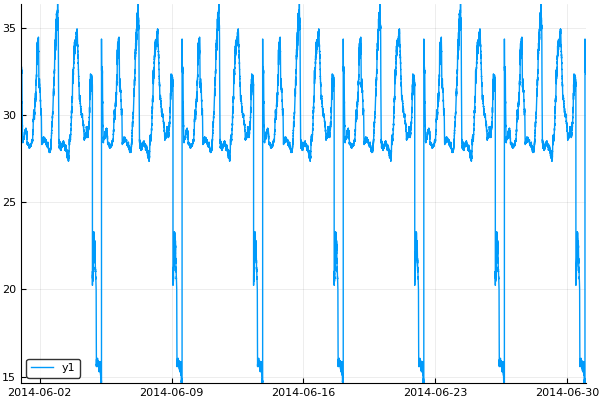

In [21]:
#plot(Tiempo, skipmissing(Temp))
#plot(Tiempo, Temp, missingstring=" ", ".")
plot(Tiempo, Temp1)